In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cfeature

In [2]:
dataset=xr.open_dataset('combined_file.nc')
RR = dataset.where(dataset != -99.0 ,np.nan)
#.groupby('time.month').count('time')

In [3]:
ds=RR
ds

<xarray.Dataset>
Dimensions:   (datetime: 10958, lat: 288, lon: 280)
Coordinates:
  * datetime  (datetime) datetime64[ns] 1991-01-01 1991-01-02 ... 2020-12-31
  * lon       (lon) float32 -19.25 -19.0 -18.75 -18.5 ... 49.75 50.0 50.25 50.5
  * lat       (lat) float32 34.25 34.0 33.75 33.5 ... -36.75 -37.0 -37.25 -37.5
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime, lat, lon) float32 0.0 0.0 0.0 0.0 ... 14.19 14.56 11.65
Attributes:
    Conventions:  CF-1.6

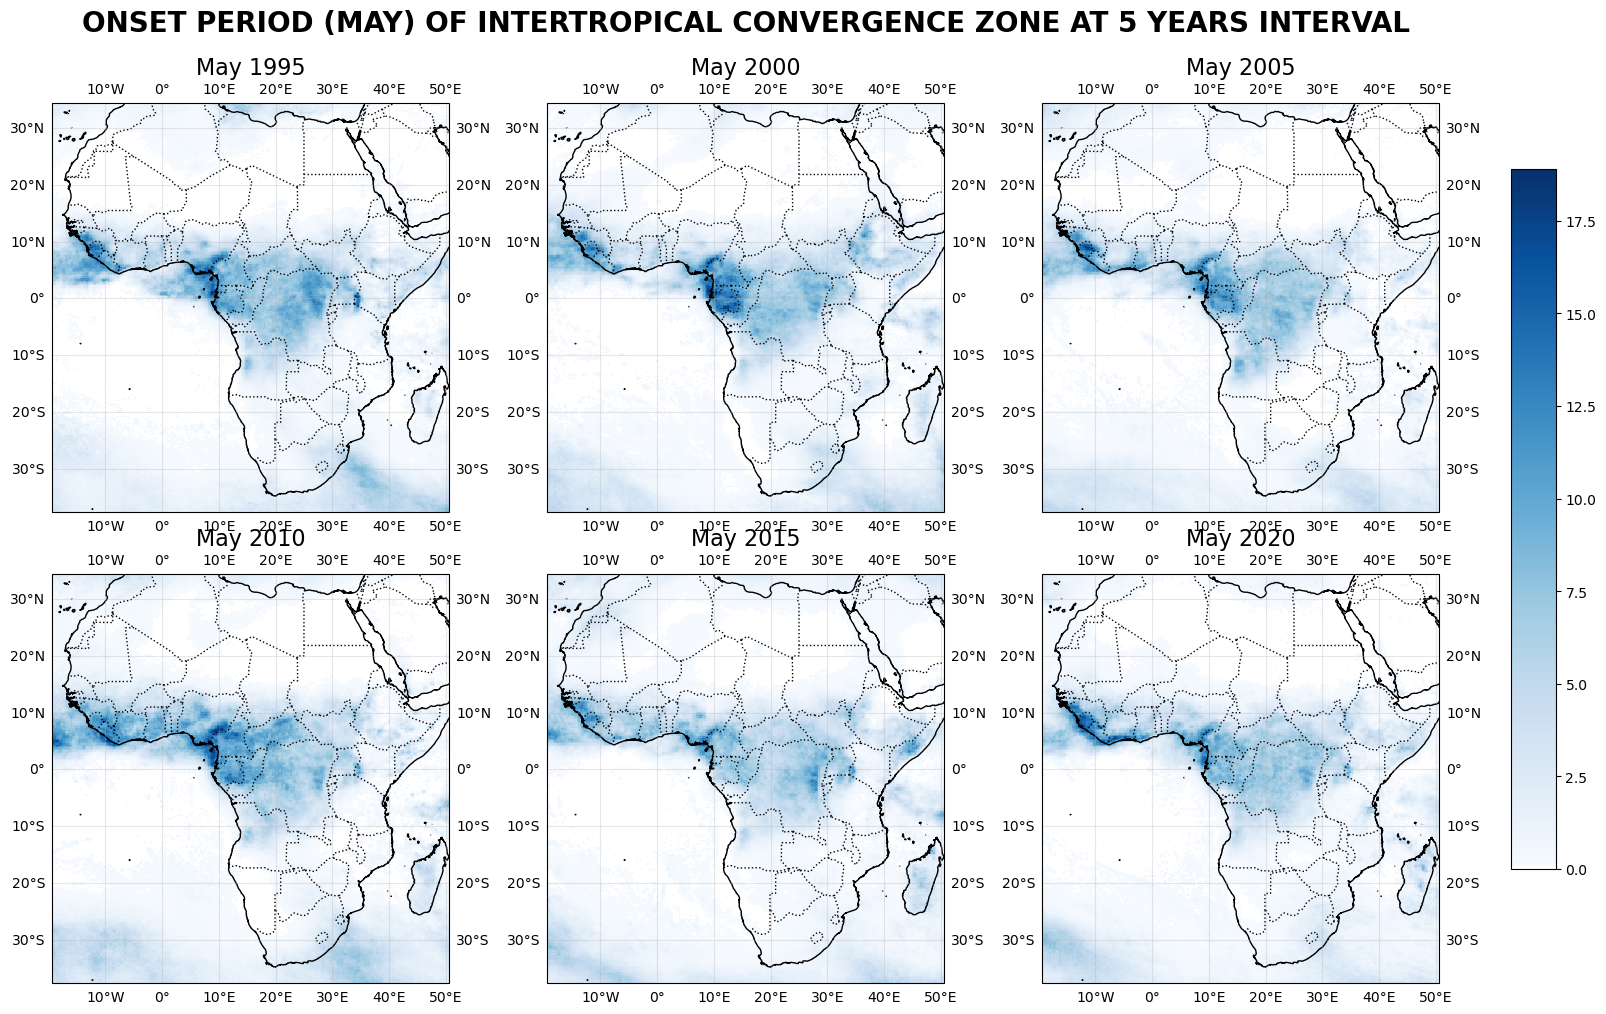

In [4]:
# Define the range of years and the month of interest
start_year = 1995
end_year = 2020
interval = 5
month_of_interest = 10  # May
# Create a list of years at the specified intervals
years = list(range(start_year, end_year + 1, interval))
# Define colormap
cmap = plt.get_cmap('Blues')
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("Blues", colors)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 10))
plt.subplots_adjust(wspace=0.01,hspace=0.35)

for i, year in enumerate(years):
    # Select data for the specific year and month
    data = RR.sel(datetime=RR['datetime'].dt.year == year)
    data = data.sel(datetime=data['datetime'].dt.month == month_of_interest)

    # Calculate the mean over the month of May
    mean_rainfall = data['precip'].mean(dim='datetime')

    # Plot
    ax = axes.flat[i]
    cs = ax.pcolormesh(mean_rainfall['lon'], mean_rainfall['lat'], mean_rainfall, cmap=new_cmap, transform=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f'May {year}', fontsize=16)

    # Grid layout
    gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 0}
    gl.ylabel_style = {'color': 'black'}

# Remove any empty subplots
if len(years) < axes.size:
    for j in range(len(years), axes.size):
        fig.delaxes(axes.flat[j])

# Colorbar
cbar_ax = fig.add_axes([1.01, 0.15, 0.03, 0.7])  # Adjusted lbwh for better positioning
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')

fig.suptitle('ONSET PERIOD (MAY) OF INTERTROPICAL CONVERGENCE ZONE AT 5 YEARS INTERVAL', fontweight='bold', fontsize=20, y=1.01)
plt.tight_layout()  # Adjust rect to accommodate the suptitle
plt.show()


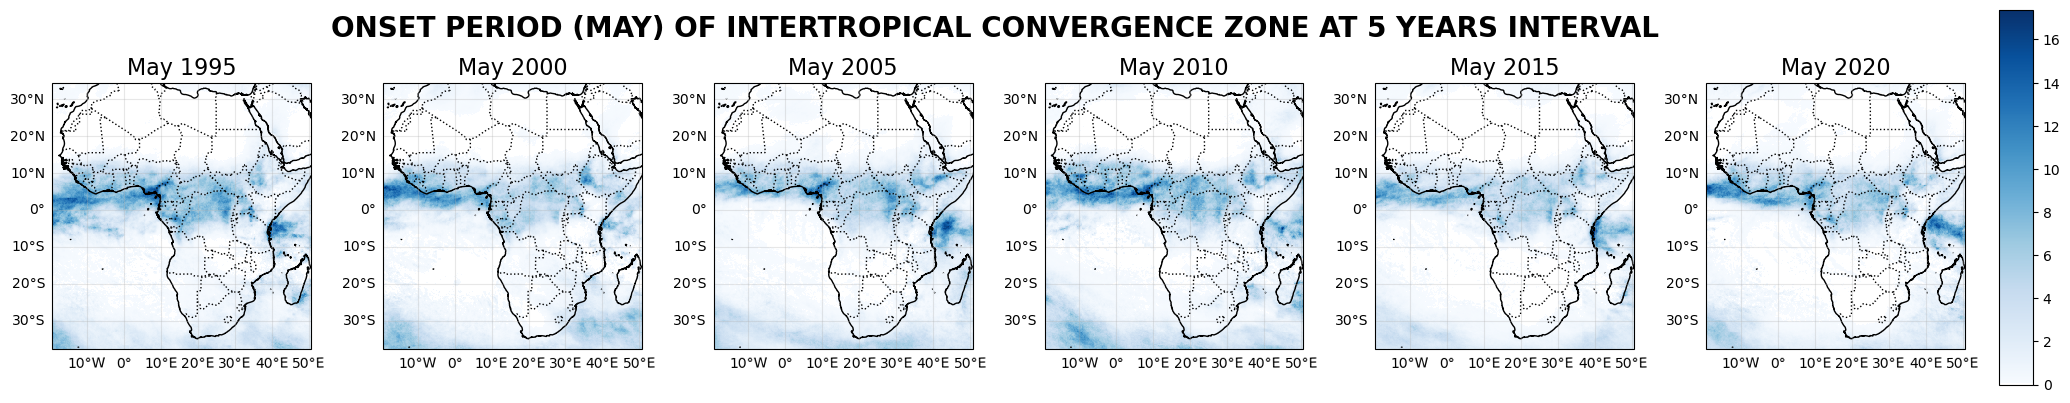

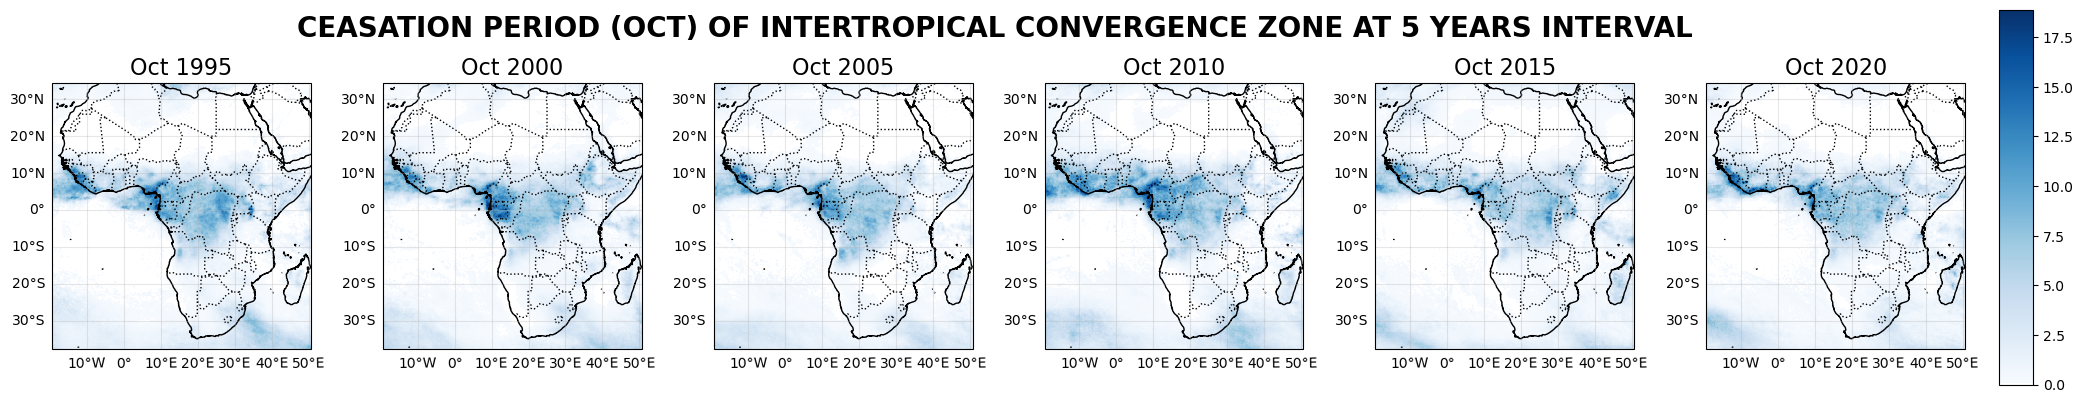

In [5]:
#ds['time'] = xr.cftime_range(start=str(ds['time.year'][0]), periods=ds.sizes['time'], freq='D')
# Define the range of years and the month of interest
start_year = 1995
end_year = 2020
interval = 5
month_of_interest = 5  # May

# Create a list of years at the specified intervals
years = list(range(start_year, end_year + 1, interval))

cmap = plt.get_cmap('Blues')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("Blues_r", colors)


# Plotting
fig, axes = plt.subplots(nrows=1, ncols= 6, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 5))

for i, year in enumerate(years):
    # Select data for the specific year and month
    data = RR.sel(datetime=RR['datetime'].dt.year == year)
    data = data.sel(datetime=data['datetime'].dt.month == month_of_interest)

    # Calculate the mean over the month of May
    mean_rainfall = data['precip'].mean(dim='datetime')

    # Plot
    ax = axes[i]
    cs= ax.pcolormesh(mean_rainfall['lon'],mean_rainfall['lat'],mean_rainfall, cmap=new_cmap)
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f'May {year}', fontsize=16)
# grid layout
    gl = ax.gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
#plotting

#colorbar
cbar_ax = fig.add_axes([1.002, 0.12, 0.017, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
#cbar.set_label("PRECIPITATION (mm)", fontsize=15, fontweight='bold')

fig.suptitle('ONSET PERIOD (MAY) OF INTERTROPICAL CONVERGENCE ZONE AT 5 YEARS INTERVAL', fontweight = 'bold',fontsize=20, y=0.86)
plt.tight_layout()
plt.show()



#ds['time'] = xr.cftime_range(start=str(ds['time.year'][0]), periods=ds.sizes['time'], freq='D')
# Define the range of years and the month of interest
start_year = 1995
end_year = 2020
interval = 5
month_of_interest = 10 # May

# Create a list of years at the specified intervals
years = list(range(start_year, end_year + 1, interval))

cmap = plt.get_cmap('Blues')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("Blues", colors)


# Plotting
fig, axes = plt.subplots(nrows=1, ncols= 6, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 5))

for i, year in enumerate(years):
    # Select data for the specific year and month
    data = RR.sel(datetime=RR['datetime'].dt.year == year)
    data = data.sel(datetime=data['datetime'].dt.month == month_of_interest)

    # Calculate the mean over the month of May
    mean_rainfall = data['precip'].mean(dim='datetime')

    # Plot
    ax = axes[i]
    cs= ax.pcolormesh(mean_rainfall['lon'],mean_rainfall['lat'],mean_rainfall, cmap=new_cmap)
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f'Oct {year}', fontsize=16)
# grid layout
    gl = ax.gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
#plotting

#colorbar
cbar_ax = fig.add_axes([1.002, 0.12, 0.017, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
#cbar.set_label("PRECIPITATION (mm)", fontsize=15, fontweight='bold')

fig.suptitle('CEASATION PERIOD (OCT) OF INTERTROPICAL CONVERGENCE ZONE AT 5 YEARS INTERVAL', fontweight = 'bold',fontsize=20, y=0.86)
plt.tight_layout()
plt.show()